In [5]:
import matplotlib.pyplot as plt
import sys
import os 

sys.path.append(r'/home/hcst/HCST_lib/ORCA/dcamsdk4/samples/python')

from dcam import *

In [2]:
import sys
sys.path.append(r'/home/hcst/HCST_lib/ORCA/dcamsdk4/samples/python')
from dcamapi4 import DCAM_IDPROP
# print(list(DCAM_IDPROP))

In [10]:
DCAM_IDPROP.TRIGGERSOURCE

<DCAM_IDPROP.TRIGGERSOURCE: 1048848>

In [4]:
DCAM_IDPROP.SUBARRAYHSIZE

<DCAM_IDPROP.SUBARRAYHSIZE: 4202784>

In [6]:
"""Sample script for showing a captured image with dcam.py.

This script recognizes the camera and acquires a single image with dcam.py.
The acquired image is displayed with OpenCV.

This sample source code just shows how to use DCAM-API.
The performance is not guranteed.
"""

__date__ = '2021-06-18'
__copyright__ = 'Copyright (C) 2021-2024 Hamamatsu Photonics K.K.'

# import cv2
# pip install opencv-python
# Tested Version (Win/Lnx): 4.6.0.66/4.9.0.80
# License: Apache2 Software License (https://github.com/opencv/opencv/blob/master/LICENSE)
# for disply image

from dcam import *
# control DCAM functions

def dcamtest_show_framedata(data):
    """Show image data.

    Show numpy buffer as an image with OpenCV function.

    Args:
        data (void): NumPy array.

    Returns:
        Nothing.
    """
    if data.dtype == np.uint16:
        imax = np.amax(data)
        if imax > 0:
            imul = int(65535 / imax)
            # print('Multiple %s' % imul)
            data = data * imul

        plt.imshow(data)
    else:
        print('-NG: dcamtest_show_image(data) only support Numpy.uint16 data')


def dcam_show_single_captured_image(dcam):
    """Show a single image.
    
    Capture and show a single image.

    Args:
        iDevice (int): Device index.

    Returns:
        Nothing.
    """

    if dcam.buf_alloc(1):
        if dcam.cap_snapshot():
            timeout_milisec = 1000
            while True:
                if dcam.wait_capevent_frameready(timeout_milisec):
                    data = dcam.buf_getlastframedata()
                    dcamtest_show_framedata(data)
                    break

                dcamerr = dcam.lasterr()
                if dcamerr.is_timeout():
                    print('===: timeout')
                    continue

                print('-NG: Dcam.wait_event() fails with error {}'.format(dcamerr))
                break
        else:
            print('-NG: Dcam.cap_start() fails with error {}'.format(dcam.lasterr()))

        dcam.buf_release()
    else:
        print('-NG: Dcam.buf_alloc(1) fails with error {}'.format(dcam.lasterr()))






In [7]:
# dcamcon.set_propertyvalue(DCAM_IDPROP.EXPOSURETIME, 0.01) 


if Dcamapi.init(): # this is failing for some reason, worked second time?
    dcam = Dcam(0)
    if dcam.dev_open():
        print(dcam.prop_getvalue(DCAM_IDPROP.EXPOSURETIME)) 
    else:
        print('-NG: Dcam.dev_open() fails with error {}'.format(dcam.lasterr()))
else:
    print('-NG: Dcamapi.init() fails with error {}'.format(Dcamapi.lasterr()))
    # Dcamapi.uninit()



0.0082944


In [10]:
# DCAM_IDPROP_BINNING_INDEPENDENT 
print(dcam.prop_getvalue(DCAM_IDPROP.BINNING_INDEPENDENT))
print(dcam.prop_getvalue(DCAM_IDPROP.BINNING))
print(dcam.prop_setgetvalue(DCAM_IDPROP.BINNING, 4))


False
1.0
4.0


In [31]:
print(dcam.prop_setgetvalue(DCAM_IDPROP.EXPOSURETIME, 0.0001))

print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYHSIZE, 300))
print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYVSIZE, 400))

print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYHPOS, 1700))
print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYVPOS, 800))
dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYMODE, DCAMPROP.MODE.OFF)

0.0001008
300.0
400.0
1700.0
800.0


1.0

In [85]:
456+56
2**9

512

In [91]:
print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYHSIZE, 300))
print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYVSIZE, 100))

print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYHPOS, 800))
print(dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYVPOS, 576))
dcam.prop_setgetvalue(DCAM_IDPROP.SUBARRAYMODE, DCAMPROP.MODE.ON)

300.0
100.0
800.0
576.0


2.0

In [ ]:
    # class SENSORCOOLER(IntEnum):
    #     OFF = 1
    #     ON = 2
    #     MAX = 4

    # class SENSORTEMPERATURE_STATUS(IntEnum):
    #     NORMAL = 0
    #     WARNING = 1
    #     PROTECTION = 2

    # class SENSORCOOLERSTATUS(IntEnum):
    #     ERROR4 = -4
    #     ERROR3 = -3
    #     ERROR2 = -2
    #     ERROR1 = -1
    #     NONE = 0
    #     OFF = 1
    #     READY = 2
    #     BUSY = 3
    #     ALWAYS = 4
    #     WARNING = 5

 # sensor cooler
    # SENSORTEMPERATURE = 2097936  # 0x00200310, R/O, celsius,"SENSOR TEMPERATURE"

    # *SENSORCOOLER = 2097952  # 0x00200320, R/W, mode,    "SENSOR COOLER"

    # *SENSORTEMPERATURETARGET = 2097968  # 0x00200330, R/W, celsius,"SENSOR TEMPERATURE TARGET"

    # SENSORCOOLERSTATUS = 2097984  # 0x00200340, R/O, mode,  "SENSOR COOLER STATUS"

    # *SENSORCOOLERFAN = 2098000  # 0x00200350, R/W, mode, "SENSOR COOLER FAN"

    # SENSORTEMPERATURE_AVE = 2098016  # 0x00200360, R/O, celsius,"SENSOR TEMPERATURE AVE"
    # SENSORTEMPERATURE_MIN = 2098032  # 0x00200370, R/O, celsius,"SENSOR TEMPERATURE MIN"
    # SENSORTEMPERATURE_MAX = 2098048  # 0x00200380, R/O, celsius,"SENSOR TEMPERATURE MAX"
    # SENSORTEMPERATURE_STATUS = 2098064  # 0x00200390, R/O, mode,    "SENSOR TEMPERATURE STATUS"

    # *SENSORTEMPERATURE_PROTECT = 2098176  # 0x00200400, R/W, mode,   "SENSOR TEMPERATURE MODE"
    # # mechanical shutter

In [5]:
print(dcam.prop_getvalue(DCAM_IDPROP.SENSORCOOLERFAN))
print(dcam.prop_getvalue(DCAM_IDPROP.SENSORCOOLERSTATUS))
print(dcam.prop_getvalue(DCAM_IDPROP.SENSORCOOLER))


1.0
1.0
1.0


In [11]:
print(dcam.prop_getvalue(DCAM_IDPROP.SENSORCOOLERFAN))

print(dcam.prop_setgetvalue(DCAM_IDPROP.SENSORCOOLER, 2))
print(dcam.prop_getvalue(DCAM_IDPROP.SENSORCOOLERSTATUS))

1.0
2.0
2.0


In [5]:
# print(dcam.prop_setgetvalue(DCAM_IDPROP.SENSORCOOLER, True))
# print(dcam.prop_setgetvalue(DCAM_IDPROP.SENSORCOOLERFAN, True))
# print(dcam.prop_setgetvalue(DCAM_IDPROP.SENSORTEMPERATURETARGET, 2))
print(dcam.prop_getvalue(DCAM_IDPROP.SENSORTEMPERATURETARGET))

print(dcam.prop_getvalue(DCAM_IDPROP.SENSORTEMPERATURE))



False
19.0


In [31]:
print(dcam.prop_setgetvalue(DCAM_IDPROP.SENSORTEMPERATURETARGET, True))


False


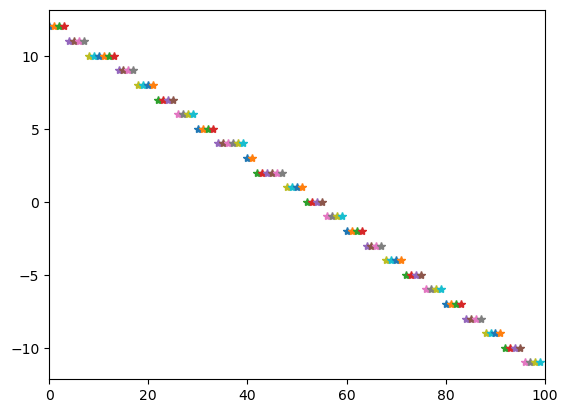

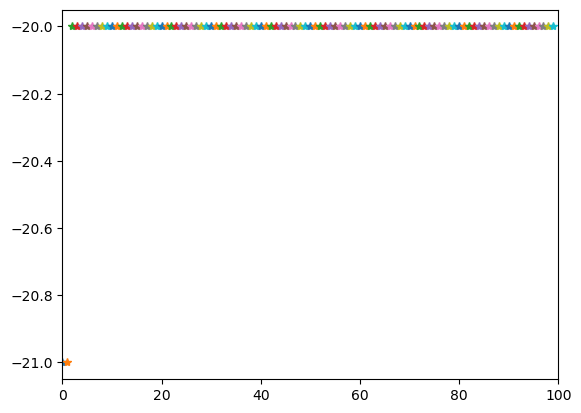

In [33]:
import time
plt.figure()
for i in range(100):
    temp = dcam.prop_getvalue(DCAM_IDPROP.SENSORTEMPERATURE)
    plt.plot(i,temp, '*')
    plt.xlim((0,100))
    plt.draw()
    time.sleep(0.5)
    # print(temp)
plt.show()
    

In [18]:
print(dcam.prop_getvalue(DCAM_IDPROP.TRIGGERSOURCE))
print(dcam.prop_getvalue(DCAM_IDPROP.TRIGGER_MODE))

print(dcam.prop_getvalue(DCAMPROP.TRIGGER_MODE.START))


1.0
1.0
False


1.44e-05


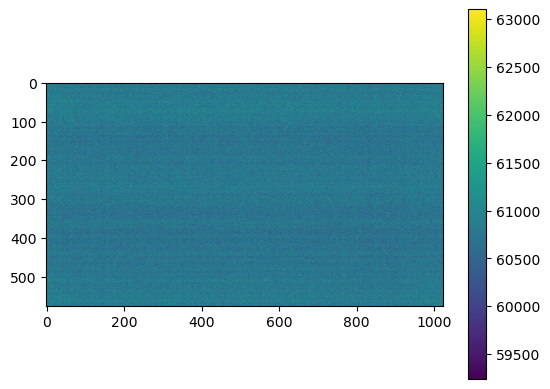

In [12]:
print(dcam.prop_setgetvalue(DCAM_IDPROP.EXPOSURETIME, 0.00001))

dcam_show_single_captured_image(dcam)
plt.colorbar()

In [20]:
triggersource = dcam.prop_getvalue(DCAM_IDPROP.TRIGGERSOURCE)
trigger_mode = dcam.prop_getvalue(DCAM_IDPROP.TRIGGER_MODE)

firetrigger_cycle = 0
framecount_till_firetrigger = 0
if triggersource == DCAMPROP.TRIGGERSOURCE.SOFTWARE:
    if trigger_mode == DCAMPROP.TRIGGER_MODE.START:
        # Software Start requires only one firetrigger at beginning
        firetrigger_cycle = 0
    elif trigger_mode == DCAMPROP.TRIGGER_MODE.PIV:
        # PIV require firetrigger for 2 frames
        firetrigger_cycle = 2
    else:
        # standard software trigger requires one firetrigger for one frame
        firetrigger_cycle = 1
firetrigger_cycle   

0

In [13]:
Dcamapi.uninit()


True

In [13]:

# dcam_show_single_captured_image(dcam)

dcam.dev_close()

Dcamapi.uninit()


True

In [5]:
propattr_hsize = dcam.prop_getattr(DCAM_IDPROP.SUBARRAYHSIZE)
propattr_vsize = dcam.prop_getattr(DCAM_IDPROP.SUBARRAYVSIZE)

print(propattr_hsize.valuemin, propattr_vsize.valuemin, propattr_hsize.valuemax, propattr_vsize.valuemax) # cant be bigger than 4?


4.0 4.0 4096.0 2304.0


In [6]:
propattr_hsize

In [4]:
def dcam_show_device_list():
    """Show device list.
    
    Show model names ans IDs of the connected camera.

    Returns:
        Nothing.
    """
    if Dcamapi.init():
        n = Dcamapi.get_devicecount()
        for i in range(0, n):
            dcam = Dcam(i)
            output = '#{}: '.format(i)

            model = dcam.dev_getstring(DCAM_IDSTR.MODEL)
            if model is False:
                output = output + 'No DCAM_IDSTR.MODEL'
            else:
                output = output + 'MODEL={}'.format(model)

            cameraid = dcam.dev_getstring(DCAM_IDSTR.CAMERAID)
            if cameraid is False:
                output = output + ', No DCAM_IDSTR.CAMERAID'
            else:
                output = output + ', CAMERAID={}'.format(cameraid)

            print(output)
    else:
        print('-NG: Dcamapi.init() fails with error {}'.format(Dcamapi.lasterr()))


In [5]:
dcam_show_device_list()


#0: MODEL=C15550-20UP, CAMERAID=S/N: 000566


True

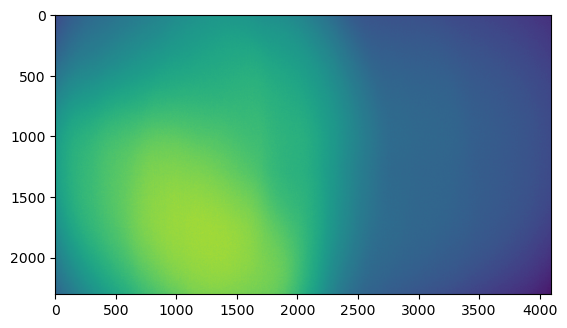

In [15]:
Dcamapi.init()
dcam = Dcam(0)
if dcam.dev_open():
    if dcam.buf_alloc(1):
        if dcam.cap_snapshot():
            timeout_milisec = 1000
            while True:
                if dcam.wait_capevent_frameready(timeout_milisec):
                    data = dcam.buf_getlastframedata()
                    dcamtest_show_framedata(data)
                    break

                dcamerr = dcam.lasterr()
                if dcamerr.is_timeout():
                    print('===: timeout')
                    continue

                print('-NG: Dcam.wait_event() fails with error {}'.format(dcamerr))
                break
        else:
            print('-NG: Dcam.cap_start() fails with error {}'.format(dcam.lasterr()))

        dcam.buf_release()
    else:
        print('-NG: Dcam.buf_alloc(1) fails with error {}'.format(dcam.lasterr()))
    dcam.dev_close()
else:
    print('-NG: Dcam.dev_open() fails with error {}'.format(dcam.lasterr()))


Dcamapi.uninit()